# 支撑向量机(Support Vector Machine)

## 原理

### 归纳解释

- 既可以解决**回归**, 又可以解决**分类**
- SVM**本身具有泛化能力**, 不依靠正则化和预处理
- 需要进行归一化处理
  
  
- **Hard Margin SVM(清晰地边界)**
  - SVM尝试寻找一个最优的决策边界,距离两个类别的最近的样本最远
  - SVM的目的最大化margin
  - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413132734.PNG)  
    

- **Soft Margin SVM(不清晰的边界)**
  - 决策边界线性不可分
  - 拥有一定容错能力
  - C越大越趋近hard margin SVM
  - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413144505.PNG)

- 回归问题
  - 在margin里面容纳尽可能多的点
  - ![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413172503.PNG)

### 公式推导(Hard Margin)

- 解析几何, 点到直线的距离
  - (X,Y)到Ax+By+C=0的距离
    - $\frac{|A x+B y+C|}{\sqrt{A^{2}+B^{2}}}$
  - 拓展到n维空间
    - $\begin{array}{l}
{\theta ^T}{x_b} = 0\\
{w^T}x + b = 0\\
\frac{{\left| {{w^T}x + b} \right|}}{{\left\| w \right\|}} = 0\\
\left\| w \right\| = \sqrt {w_1^2 + w_2^2 +  \cdots  + w_n^2} 
\end{array}$ 
- 所有的点到决策边界的距离>=d, $\forall$表示任意一个
  - $\left\{\begin{aligned}
\frac{w^{T} x^{(i)}+b}{\|w\|} \geq d & & \forall y^{(i)}=1 \\
\frac{w^{T} x^{(i)}+b}{\|w\|} \leq-d & & \forall y^{(i)}=-1
\end{aligned}\right.$
 
- 两边除以d  
  - $\left\{\begin{aligned}
\frac{w^{T} x^{(i)}+b}{\|w\| d} \geq 1 & & \forall y^{(i)}=1 \\
\frac{w^{T} x^{(i)}+b}{\|w\| d} \leq-1 & & \forall y^{(i)}=-1
\end{aligned}\right.$ 
- $\left\|w\right\|d$是一个数,同时除一个数,进行变形  
  - $\left\{\begin{array}{cl}
w_{d}^{T} x^{(i)}+b_{d} \geq 1 & \forall y^{(i)}=1 \\
w_{d}^{T} x^{(i)}+b_{d} \leq-1 & \forall y^{(i)}=-1
\end{array}\right.$  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413135753.PNG)  
- 因为等号右边是0,同时除以一个常数不变  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413135757.PNG)
- 简化符号去掉角标,代表意义于最初不同  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413140515.PNG)  
- 融合成一个式子  
  - $y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1$ 
- 最小化的目标  
  - $\begin{array}{l}
\max \frac{{\left| {{w^T}x + b} \right|}}{{w}}\\
\max \frac{1}{{w}}\\
\min w
\end{array}$  
- 求导求极值(有条件求导,需要用拉普拉斯算子)  
  - $\min \frac{1}{2}\|w\|^{2}$
  - $st.\quad y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1$










### 公式推导(Soft Margin)

- 要使求导后的最小化函数有一定容错能力
- 采用类似正则的法式, 将决策边界允许平移一段距离$\zeta$
  - $\min \frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{m} \zeta_{i}$
  - $st. y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1-\zeta_{i}$
  - $\zeta_{i} \geq 0$  
- 比较L1正则, L2正则
  - L1正则
    - $\min \frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{m} \zeta_{i}$
    - $st . \quad y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1-\zeta_{i}$
    - $\zeta_{i} \geq 0$
  - L2正则
    - $\min \frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{m} \zeta_{i}^{2}$
    - $st . \quad y^{(i)}\left(w^{T} x^{(i)}+b\right) \geq 1-\zeta_{i}$
    - $\zeta_{i} \geq 0$


## 核函数

- **将原输入数据变形,以满足需求**
- 数学上的问题转换  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413153230.PNG)  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413153234.PNG)

### 多项式核函数

![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413153350.PNG)

### 高斯核函数

- 也称为RBF(镜像奇函数)
- 高斯核函数是将每个样本点映射到一个无穷维的特征空间  
- 高斯函数 
$$g(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{2}}$$  
![](https://raw.githubusercontent.com/LinCheungS/PicGo_Image_Storage/master/2020/20200413170659.PNG)  
- 高斯核函数  
$$K(x, y)=e^{-\left.\gamma|| x - y\right||^{2}}$$ 
- gamma越大高斯分布越窄
- gamma越小高斯分布越宽


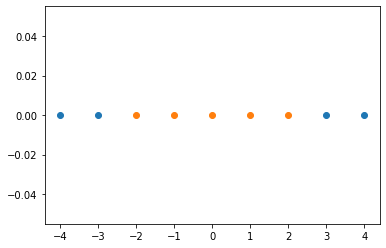

In [0]:
# 将一维数据映射到两维
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-4, 5, 1)
y = np.array((x >= -2) & (x <= 2), dtype='int')
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))
plt.show()

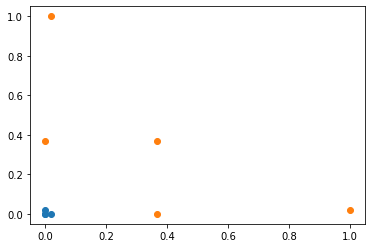

In [0]:
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)
l1, l2 = -1, 1

X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)
plt.scatter(X_new[y==0,0], X_new[y==0,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.show()

## Sklearn二分类

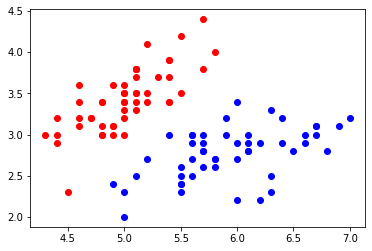

In [1]:
# 只进行fit过程
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
# 标准化
standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)
# 调用svm
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

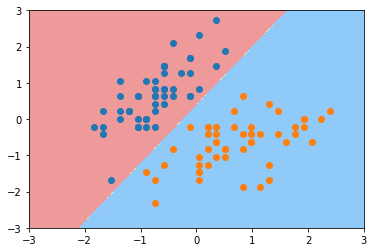

In [6]:
# C的约束为C=1e9,容错率较小
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [7]:
svc2 = LinearSVC(C=0.01)
svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

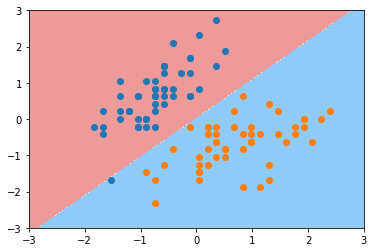

In [8]:
# C的约束为C=0.01,容错率高
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

## Sklearn多分类

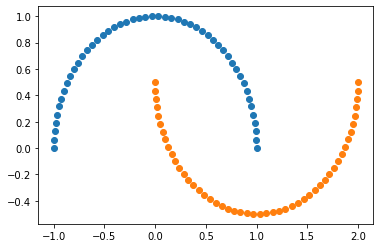

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
# 生成moon样子的数据
X, y = datasets.make_moons()
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

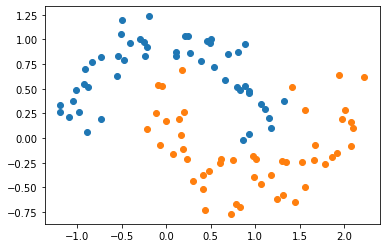

In [10]:
# 加噪音
X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def PolynomialKernelSVC(degree, C):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel="poly", degree=degree, C=C))
    ])

poly_kernel_svc = PolynomialKernelSVC(degree=3, C=0.0001)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernelSVC',
                 SVC(C=0.0001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='poly', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

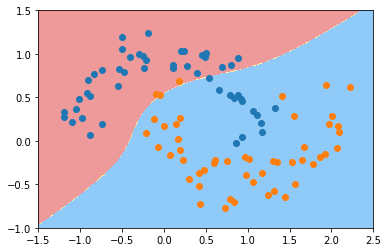

In [12]:
# 容错率高
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

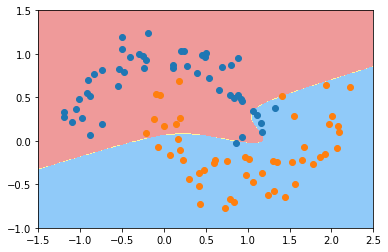

In [13]:
# 容错率低
poly_kernel_svc = PolynomialKernelSVC(degree=3, C=1000)
poly_kernel_svc.fit(X, y)
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## Sklearn高斯核函数

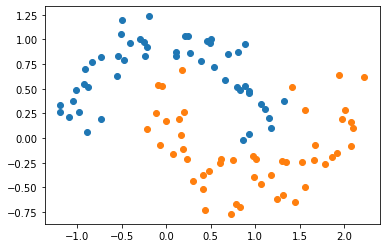

In [14]:
## 高斯核函数
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

def RBFKernelSVC(gamma):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

svc = RBFKernelSVC(gamma=1)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

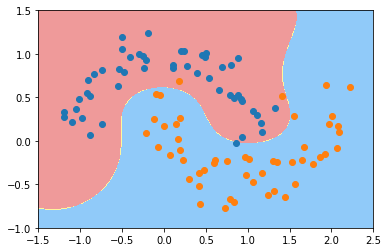

In [16]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [17]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=100, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

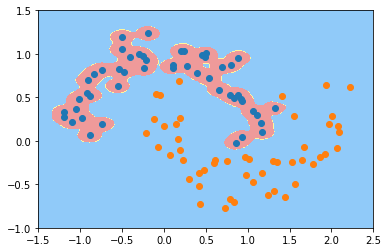

In [18]:
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [19]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

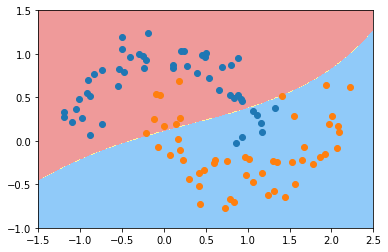

In [20]:
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## Sklearn回归问题

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [22]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', LinearSVR(epsilon=epsilon))
    ])

In [23]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVR',
                 LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [24]:
svr.score(X_test, y_test)

0.6354924961657551

In [25]:
# 修改参数提升准确率
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('linearSVR', SVR(kernel="rbf",epsilon=epsilon,C=50))
    ])

In [26]:
svr = StandardLinearSVR()
svr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVR',
                 SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [27]:
svr.score(X_test, y_test)

0.8251665336701568